In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Purpose of this notebook is to get updated data from the internet and then filter data and save to modified_data folder with name 'corona_new'
# https://ourworldindata.org/#entries
# Get table_coviddata to Internet
table_covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
# Table 2 Freedom Index 
table_freedom_press = pd.read_csv('modified_data/table_freedom_press.csv',decimal=',')
# Table 3 GDP index
table_gdp = pd.read_csv('modified_data/table_gdp.csv')
# Table 4 Population Index 
table_population = pd.read_csv('modified_data/table_population.csv')
# Table 5 Human Freedom
table_hfi = pd.read_csv('modified_data/table_hfi.csv', na_values='-')
# Table 6 Health Expenditure Index created in nha2.csv
table_health_expenditure = pd.read_csv('modified_data/table_health_expenditure.csv')

# Delete unnecessary coloums
del table_covid['iso_code']

# NOTE: only Table 1 will replace with the script because we get table 1 from the internet. 
# Other tables come from the local file. We can edit their values in the file manually. 
# However, table 1 comes from online they have to be modified. Otherwise, we have to adjust country values every time manually when data is changed by online.
table_covid = table_covid.replace(['Brunei'], 'Brunei Darussalam')
table_covid = table_covid.replace(['Czechia'], 'Czech Rep.')
table_covid = table_covid.replace(['Democratic Republic of Congo'], 'DR Congo')
table_covid = table_covid.replace(['Cote d\'Ivoire'], 'Ivory Coast')
table_covid = table_covid.replace(['South Korea'],'Korea, South')
table_covid = table_covid.replace(['Kyrgyzstan'], 'Kyrgyz Republic')
table_covid = table_covid.replace(['Slovakia'],'Slovak Rep.')
table_covid = table_covid.replace(['Timor'],'Timor-Leste')

# Clean unnecessary features because other table have better
del table_covid['continent']

# Replace Nan with 0 
table_covid['total_cases'] = table_covid['total_cases'].fillna(0)
table_covid['new_cases'] = table_covid['new_cases'].fillna(0)
table_covid['new_cases_smoothed'] = table_covid['new_cases_smoothed'].fillna(0)
table_covid['total_deaths'] = table_covid['total_deaths'].fillna(0)
table_covid['new_deaths'] = table_covid['new_deaths'].fillna(0)
table_covid['new_deaths_smoothed'] = table_covid['new_deaths_smoothed'].fillna(0)
table_covid['total_cases_per_million'] = table_covid['total_cases_per_million'].fillna(0)
table_covid['new_cases_per_million'] = table_covid['new_cases_per_million'].fillna(0)
table_covid['new_cases_smoothed_per_million'] = table_covid['new_cases_smoothed_per_million'].fillna(0)
table_covid['total_deaths_per_million'] = table_covid['total_deaths_per_million'].fillna(0)
table_covid['new_deaths_per_million'] = table_covid['new_deaths_per_million'].fillna(0)
table_covid['new_deaths_smoothed_per_million'] = table_covid['new_deaths_smoothed_per_million'].fillna(0)

# Delete some features due to not enough information may be in future it would be added if enough data is added from internet
del table_covid['icu_patients']
del table_covid['icu_patients_per_million']
del table_covid['hosp_patients']
del table_covid['hosp_patients_per_million']
del table_covid['total_vaccinations']
del table_covid['total_vaccinations_per_hundred']
del table_covid['handwashing_facilities']
del table_covid['weekly_icu_admissions']
del table_covid['weekly_icu_admissions_per_million']
del table_covid['weekly_hosp_admissions']
del table_covid['weekly_hosp_admissions_per_million']
del table_covid['reproduction_rate']
del table_covid['new_tests']
del table_covid['total_tests']
del table_covid['total_tests_per_thousand']
del table_covid['new_tests_per_thousand']
del table_covid['new_tests_smoothed']
del table_covid['new_tests_smoothed_per_thousand']
del table_covid['positive_rate']
del table_covid['tests_per_case']
del table_covid['tests_units']


# Şu kısımda bazı NaN değerleri doldurmaya çalışıyoruz eğer yazılacak herhangibir değer yoksa o değeri siliyorum
# --------------------------------------------------------------------------------------------------------------------
# Some countries dont have exterme poverty or their values just old
# Replace NaN values with old values and Zeros
bahrain = table_covid['location'].str.startswith('Bahrain')
table_covid.loc[bahrain,'extreme_poverty'] = 0.0
belarus = table_covid['location'].str.startswith('Belarus')
table_covid.loc[belarus,'extreme_poverty'] = 0.0
botswana = table_covid['location'].str.startswith('Botswana')
table_covid.loc[botswana,'extreme_poverty'] = 18.2
capeVerde = table_covid['location'].str.startswith('Cape Verde')
table_covid.loc[capeVerde,'extreme_poverty'] = 8.1
germany= table_covid['location'].str.startswith('Germany')
table_covid.loc[germany,'extreme_poverty'] = 0.0
cyprus= table_covid['location'].str.startswith('Cyprus')
table_covid.loc[cyprus,'extreme_poverty'] = 0.0
czechia= table_covid['location'].str.startswith('Czechia')
table_covid.loc[czechia,'extreme_poverty'] = 0.0
eswatini= table_covid['location'].str.startswith('Eswatini')
table_covid.loc[eswatini,'extreme_poverty'] = 42.0
finland= table_covid['location'].str.startswith('Finland')
table_covid.loc[finland,'extreme_poverty'] = 0.0
france= table_covid['location'].str.startswith('France')
table_covid.loc[france,'extreme_poverty'] = 0.0
jamaica=table_covid['location'].str.startswith('Jamaica')
table_covid.loc[jamaica,'extreme_poverty'] = 1.7
japan=table_covid['location'].str.startswith('Japan')
table_covid.loc[japan,'extreme_poverty'] = 0.2
lebanon= table_covid['location'].str.startswith('Lebanon')
table_covid.loc[lebanon,'extreme_poverty'] = 0.0
mali=table_covid['location'].str.startswith('Mali')
table_covid.loc[mali,'extreme_poverty'] = 49.7
netherlands=table_covid['location'].str.startswith('Netherlands')
table_covid.loc[netherlands,'extreme_poverty'] = 0.0
slovenia= table_covid['location'].str.startswith('Slovenia')
table_covid.loc[slovenia,'extreme_poverty'] = 0.0
suriname=table_covid['location'].str.startswith('Suriname')
table_covid.loc[suriname,'extreme_poverty'] = 23.4
switzerland=table_covid['location'].str.startswith('Switzerland')
table_covid.loc[switzerland,'extreme_poverty'] = 0.0
newZeland=table_covid['location'].str.startswith('New Zeland')
table_covid.loc[newZeland,'extreme_poverty'] = 0.0
qatar=table_covid['location'].str.startswith('Qatar')
table_covid.loc[qatar,'extreme_poverty'] = 0.0
singapore=table_covid['location'].str.startswith('Singapore')
table_covid.loc[singapore,'extreme_poverty'] = 0.0
poland=table_covid['location'].str.startswith('Poland')
table_covid.loc[poland,'extreme_poverty'] = 0.0

# Drop some countries by NaN values
table_covid = table_covid.dropna(subset=['male_smokers'])
table_covid = table_covid.dropna(subset=['female_smokers'])
table_covid = table_covid.dropna(subset=['hospital_beds_per_thousand'])
table_covid = table_covid.dropna(subset=['stringency_index'])
table_covid = table_covid.dropna(subset=['aged_70_older'])
table_covid = table_covid.dropna(subset=['extreme_poverty'])

# Feature Removal Table 2
del table_freedom_press['ISO']
del table_freedom_press['FR_Country']
del table_freedom_press['ES_country']
del table_freedom_press['Zone']
del table_freedom_press['AR_country']
del table_freedom_press['FA_country']

# Feature Removal Table Population
del table_population['cca2']
del table_population['pop1970']
del table_population['pop1980']
del table_population['pop1990']
del table_population['pop2000']
del table_population['pop2010']
del table_population['pop2015']
del table_population['pop2019']
del table_population['pop2030']
del table_population['pop2050']
del table_population['WorldPercentage']

# Feature Edit Table 5
# Get only 2017 values for uptodate
table_hfi = table_hfi[(table_hfi['year'] == 2017)]

# Remove values has all NaN values 
del table_hfi['pf_association_political_establish']  # cols don't have any entrires (all Nan)
del table_hfi['pf_association_prof_establish']       #
del table_hfi['pf_association_prof_operate']         #
del table_hfi['pf_religion_estop_operate']           #
del table_hfi['pf_religion_estop_establish']         #
del table_hfi['pf_ss_women_inheritance_widows']      #
del table_hfi['pf_ss_women_inheritance_daughters']   #
del table_hfi['pf_association_sport_establish']      #
del table_hfi['pf_association_political_operate']    #
del table_hfi['pf_association_sport_operate']        #

# remove unnecessary features
del table_hfi['year']
del table_hfi['ISO_code']
del table_hfi['hf_rank']
del table_hfi['ef_rank']
del table_hfi['pf_rank']

# Somehow ef_regulation_labor_dismissal coloum is object convert float
table_hfi['ef_regulation_labor_dismissal'] = pd.to_numeric(table_hfi['ef_regulation_labor_dismissal'])

# Get mean values for Nan values by getting each region's means by column to eliminate all Null values.
row_region_means = pd.Series([], dtype=pd.StringDtype())

for index_num, row in table_hfi.iterrows():
    for col, value in row.items():
        if pd.isna(value):
            table_hfi.loc[index_num, (col)] = table_hfi[(table_hfi['region'] == row['region'])].mean()[col]

# Feature Edit Table 6
del table_health_expenditure['Unnamed: 0']


# Create Filter. If we filter by another tables, there may be some data that does not include in other tables.
list_filter = list(set(table_covid['location']) & set(table_hfi['countries']))

# Table 1 filtering
table_filtered_covid = table_covid[table_covid['location'].isin(list_filter)]
table_filtered_covid = table_filtered_covid.reset_index(drop=True)

# Table 2 filtering
table_filtered_freedom = table_freedom_press[table_freedom_press['EN_country'].isin(list_filter)]
table_filtered_freedom = table_filtered_freedom.reset_index(drop=True)

# Table 3 filtering
table_filtered_gdp = table_gdp[table_gdp['country'].isin(list_filter)]
table_filtered_gdp = table_filtered_gdp.reset_index(drop=True)

# Table 4 filternig
table_filtered_population = table_population[table_population['name'].isin(list_filter)]
table_filtered_population = table_filtered_population.reset_index(drop=True)

# Table 5 filtering
table_filtered_hfi = table_hfi[table_hfi['countries'].isin(list_filter)]
table_filtered_hfi = table_filtered_hfi.reset_index(drop=True)

# Table 6 filtering
table_filtered_health_expenditure = table_health_expenditure[table_health_expenditure['Countries'].isin(list_filter)]
table_filtered_health_expenditure = table_filtered_health_expenditure.reset_index(drop=True)

# Sort and reset indexes for concatination
table_filtered_covid = table_filtered_covid.sort_values('location').reset_index(drop=True)
table_filtered_freedom = table_filtered_freedom.sort_values('EN_country').reset_index(drop=True)
table_filtered_gdp = table_filtered_gdp.sort_values('country').reset_index(drop=True)
table_filtered_population = table_filtered_population.sort_values('name').reset_index(drop=True)
table_filtered_health_expenditure = table_filtered_health_expenditure.sort_values('Countries').reset_index(drop=True)
table_filtered_hfi = table_filtered_hfi.sort_values('countries').reset_index(drop=True)

# Merge all tables
table_full_dates = table_filtered_covid.merge(table_filtered_freedom, left_on='location', right_on='EN_country')
table_full_dates = table_full_dates.merge(table_filtered_gdp, left_on='location', right_on='country')
table_full_dates = table_full_dates.merge(table_filtered_health_expenditure, left_on='location', right_on='Countries')
table_full_dates = table_full_dates.merge(table_filtered_hfi, left_on='location', right_on='countries')
table_full_dates = table_full_dates.merge(table_filtered_population, left_on='location', right_on='name')


# Remove Unnecesary
del table_full_dates['EN_country']
del table_full_dates['country']
del table_full_dates['Countries']
del table_full_dates['countries']
del table_full_dates['name']

table_full_dates.to_csv('table_full_dates.csv')


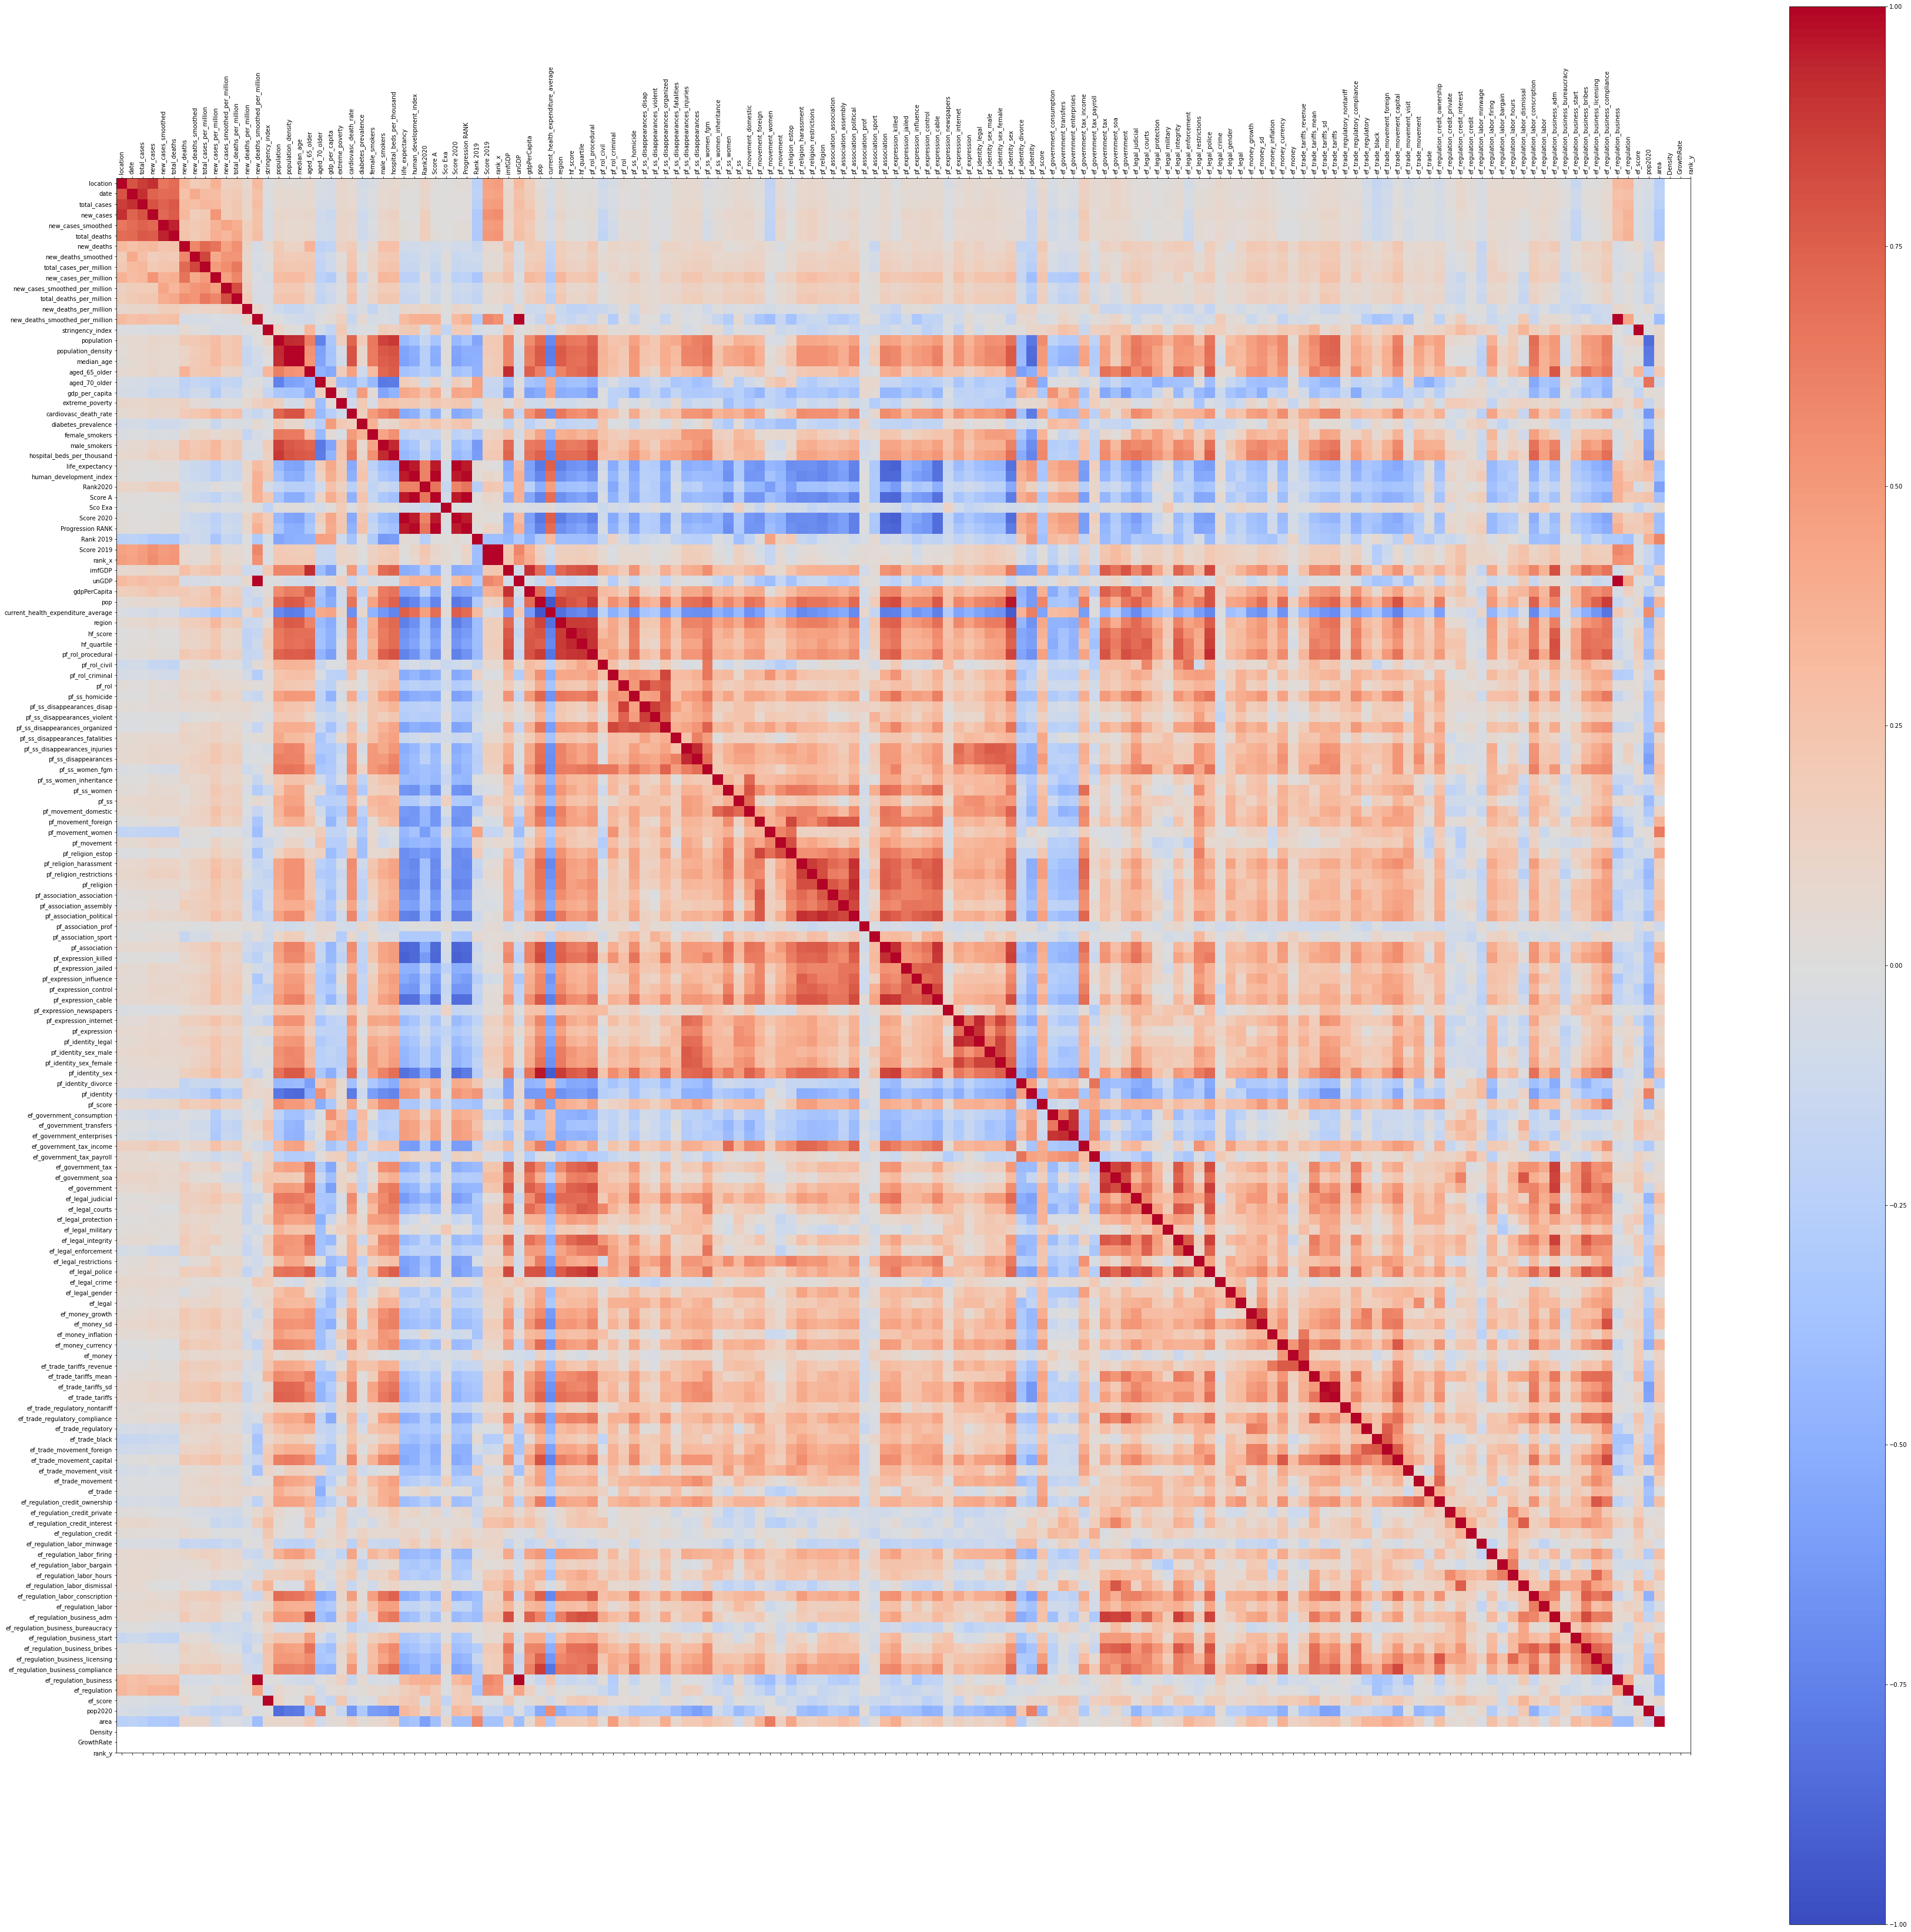

In [125]:
corr = table_full_dates.corr()
fig = plt.figure(figsize=(60,60))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(table_full_dates.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(table_full_dates.columns)
ax.set_yticklabels(table_full_dates.columns)
plt.show()

In [7]:
from scipy import stats
import matplotlib.pyplot as plt

# This script shows correlation and p values all numeric attributes with total_cases_per_million
for i in list(table_full_dates.columns.values):
    if i != 'location' and i != 'date' and i != 'region' :
        print(i, '\t', stats.pearsonr(table_full_dates['total_cases_per_million'], table_full_dates[i]))

total_cases 	 (0.3260933885775673, 0.0)
new_cases 	 (0.27264716811794526, 0.0)
new_cases_smoothed 	 (0.3032913647342026, 0.0)
total_deaths 	 (0.3223205344142043, 0.0)
new_deaths 	 (0.24079032574938727, 0.0)
new_deaths_smoothed 	 (0.2569031443620466, 0.0)
total_cases_per_million 	 (1.0, 0.0)
new_cases_per_million 	 (0.5832477773275745, 0.0)
new_cases_smoothed_per_million 	 (0.7083253975541468, 0.0)
total_deaths_per_million 	 (0.6693081804499703, 0.0)
new_deaths_per_million 	 (0.44562492663023306, 0.0)
new_deaths_smoothed_per_million 	 (0.5455731403672973, 0.0)
stringency_index 	 (0.11426022996687728, 1.6658705707365112e-92)
population 	 (-0.056250712393709316, 1.2690722899991547e-23)
population_density 	 (0.06393795487786268, 4.699253766130177e-30)
median_age 	 (0.1991288104759931, 1.307275460311397e-280)
aged_65_older 	 (0.12479108620671121, 4.171176548326963e-110)
aged_70_older 	 (0.12714211275860268, 2.974022146761213e-114)
gdp_per_capita 	 (0.3536447543273965, 0.0)
extreme_poverty 	

In [6]:
pd.options.display.max_rows = 200
table_full_dates.dtypes

location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
stringency_index                      float64
population                            float64
population_density                    float64
median_age                            float64
aged_65_older                         float64
aged_70_older                         float64
gdp_per_capita                        float64
extreme_poverty                   